In [1]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

--2023-10-12 11:51:50--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.1’

data.csv.1          100%[===================>]   1.41M  1.39MB/s    in 1.0s    

2023-10-12 11:51:52 (1.39 MB/s) - ‘data.csv.1’ saved [1475504/1475504]



In [2]:
import pandas as pd
df = pd.read_csv('data.csv')

In [3]:
df.head().T

,0,1,2,3,4
Make,BMW,BMW,BMW,BMW,BMW
Model,1 Series M,1 Series,1 Series,1 Series,1 Series
Year,2011,2011,2011,2011,2011
Engine Fuel Type,premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required)
Engine HP,335.0,300.0,300.0,230.0,230.0
Engine Cylinders,6.0,6.0,6.0,6.0,6.0
Transmission Type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
Driven_Wheels,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive
Number of Doors,2.0,2.0,2.0,2.0,2.0
Market Category,"Factory Tuner,Luxury,High-Performance","Luxury,Performance","Luxury,High-Performance","Luxury,Performance",Luxury


In [4]:

    use = ['Make',
    'Model',
    'Year',
    'Engine HP',
    'Engine Cylinders',
    'Transmission Type',
    'Vehicle Style',
    'highway MPG',
    'city mpg',
    'MSRP']

In [5]:
df = df[use].copy()

In [6]:
df.head().T

,0,1,2,3,4
Make,BMW,BMW,BMW,BMW,BMW
Model,1 Series M,1 Series,1 Series,1 Series,1 Series
Year,2011,2011,2011,2011,2011
Engine HP,335.0,300.0,300.0,230.0,230.0
Engine Cylinders,6.0,6.0,6.0,6.0,6.0
Transmission Type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
Vehicle Style,Coupe,Convertible,Coupe,Coupe,Convertible
highway MPG,26,28,28,28,28
city mpg,19,19,20,18,18
MSRP,46135,40650,36350,29450,34500


In [7]:
df = df.fillna(0)

In [8]:
df.columns = df.columns.str.replace(' ', '_').str.lower()

In [9]:
df.head().T

,0,1,2,3,4
make,BMW,BMW,BMW,BMW,BMW
model,1 Series M,1 Series,1 Series,1 Series,1 Series
year,2011,2011,2011,2011,2011
engine_hp,335.0,300.0,300.0,230.0,230.0
engine_cylinders,6.0,6.0,6.0,6.0,6.0
transmission_type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
vehicle_style,Coupe,Convertible,Coupe,Coupe,Convertible
highway_mpg,26,28,28,28,28
city_mpg,19,19,20,18,18
msrp,46135,40650,36350,29450,34500


In [10]:
categorical = df.dtypes[df.dtypes=='object'].index

In [11]:
for c in categorical:
    df[c] = df[c].str.replace(' ', '_').str.lower()

In [12]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [13]:
df[['engine_hp','engine_cylinders']] = df[['engine_hp','engine_cylinders']].fillna(0)

In [14]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [15]:
df.rename(columns={"msrp":"price"},inplace=True)

In [16]:
df_l = df.copy()

In [17]:
df.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
price                  int64
dtype: object

In [18]:
numerical = ['year','engine_hp','engine_cylinders','highway_mpg','city_mpg','price']

In [19]:
categorical = ['make','model','transmission_type','vehicle_style']

In [20]:
df.head().T

,0,1,2,3,4
make,bmw,bmw,bmw,bmw,bmw
model,1_series_m,1_series,1_series,1_series,1_series
year,2011,2011,2011,2011,2011
engine_hp,335.0,300.0,300.0,230.0,230.0
engine_cylinders,6.0,6.0,6.0,6.0,6.0
transmission_type,manual,manual,manual,manual,manual
vehicle_style,coupe,convertible,coupe,coupe,convertible
highway_mpg,26,28,28,28,28
city_mpg,19,19,20,18,18
price,46135,40650,36350,29450,34500


In [24]:
df['above_average'] = (df.price >= df.price.mean()).astype('int')
del df['price']

In [146]:
numerical.remove('price')

In [25]:
df.head().T

,0,1,2,3,4
make,bmw,bmw,bmw,bmw,bmw
model,1_series_m,1_series,1_series,1_series,1_series
year,2011,2011,2011,2011,2011
engine_hp,335.0,300.0,300.0,230.0,230.0
engine_cylinders,6.0,6.0,6.0,6.0,6.0
transmission_type,manual,manual,manual,manual,manual
vehicle_style,coupe,convertible,coupe,coupe,convertible
highway_mpg,26,28,28,28,28
city_mpg,19,19,20,18,18
above_average,1,1,0,0,0


In [26]:
from sklearn.model_selection import train_test_split

In [27]:
df_full_train,df_test = train_test_split(df,test_size = 0.2,random_state=42)

In [28]:
df_train,df_val = train_test_split(df_full_train,test_size = 0.25,random_state=42)

In [29]:
df_test.shape

(2383, 10)

In [30]:
df_train.shape

(7148, 10)

In [31]:
df_val.shape

(2383, 10)

In [33]:
y_train = df_train.above_average.values
y_test = df_test.above_average.values
y_val = df_val.above_average.values

In [73]:
from sklearn.metrics import roc_auc_score
n_features = [
    "engine_hp",
    "engine_cylinders",
    "highway_mpg",
    "city_mpg"
]

In [89]:
from operator import itemgetter
scores = []
for feat in n_features:
    m = roc_auc_score(y_train,df_train[feat].values)
    if m < 0.5:
        scores.append((feat,roc_auc_score(y_train,-df_train[feat].values)))
    else:
        scores.append((feat,m))
print(max(scores, key=itemgetter(1)))

('engine_hp', 0.9130801451267022)


# Q1: Which numerical variable (among the following 4) has the highest AUC?
# A: engine hp

In [34]:
del df_train['above_average']
del df_test['above_average']
del df_val['above_average']

In [35]:
from sklearn.feature_extraction import DictVectorizer

In [36]:
train_dicts = df_train.to_dict(orient='records')

In [37]:
df_train.nunique()

make                  48
model                869
year                  28
engine_hp            339
engine_cylinders       9
transmission_type      5
vehicle_style         16
highway_mpg           55
city_mpg              62
dtype: int64

In [38]:
    categorical

['make', 'model', 'transmission_type', 'vehicle_style']

In [39]:
dv = DictVectorizer(sparse=False)

In [40]:
val_dicts = df_val.to_dict(orient='records')

In [41]:
X_train = dv.fit_transform(train_dicts)

In [42]:
X_train.shape

(7148, 943)

In [43]:
X_val = dv.transform(val_dicts)

In [44]:
X_val.shape

(2383, 943)

In [90]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear', C=10, max_iter=1000)
model.fit(X_train,y_train)

LogisticRegression(C=10, max_iter=1000, solver='liblinear')

In [46]:
y_pred = model.predict_proba(X_val)

In [47]:
y_pred[:,1].shape

(2383,)

In [48]:
y_pred[:,1:].shape

(2383, 1)

In [49]:
avg_decision = (y_pred[:,1] >= 0.5)

In [50]:
org_accuracy = (y_val==avg_decision).mean()

In [93]:
from sklearn.metrics import roc_auc_score
print(round(roc_auc_score(y_val,avg_decision),3))

0.926


# Q2: What's the AUC of this model on the validation dataset? (round to 3 digits)
# A: 0.979

In [94]:
actual_positive = (y_val == 1)
actual_negative = (y_val == 0)

In [98]:
t = 0.5
predict_positive = (y_pred[:,1] >= t)
predict_negative = (y_pred[:,1]< t)

In [99]:
tp = (actual_positive & predict_positive).sum()

In [100]:
tn = (actual_negative & predict_negative).sum()

In [101]:
fp = (predict_positive & actual_negative).sum()
fn = (predict_negative & actual_positive).sum()

In [105]:
recall = tp / (tp+fn)
precision = tp / (tp+fp)

In [107]:
import numpy as np
thresholds = np.linspace(0,1,101)

In [113]:
scores = []
for t in thresholds:
    actual_positive = (y_val == 1)
    actual_negative = (y_val == 0)
    predict_positive = (y_pred[:,1] >= t)
    predict_negative = (y_pred[:,1] < t)
    tp = (actual_positive & predict_positive).sum()
    tn = (actual_negative & predict_negative).sum()
    fp = (predict_positive & actual_negative).sum()
    fn = (predict_negative & actual_positive).sum()
    recall = (tp+1) / (tp+fn+1)
    precision = (tp+1) / (tp+fp+1)
    scores.append((t,tp,fp,fn,tn,precision,recall))

In [114]:
columns = ['threshold','tp','fp','fn','tn','precision','recall']  
df_scores = pd.DataFrame(scores,columns=columns)

In [115]:
df_scores

,threshold,tp,fp,fn,tn,precision,recall
0,0.00,661,1722,0,0,0.277685,1.000000
1,0.01,660,818,1,904,0.446924,0.998489
2,0.02,659,661,2,1061,0.499621,0.996979
3,0.03,659,590,2,1132,0.528000,0.996979
4,0.04,659,514,2,1208,0.562181,0.996979
...,...,...,...,...,...,...,...
96,0.96,248,1,413,1721,0.996000,0.376133
97,0.97,228,0,433,1722,1.000000,0.345921
98,0.98,202,0,459,1722,1.000000,0.306647
99,0.99,165,0,496,1722,1.000000,0.250755


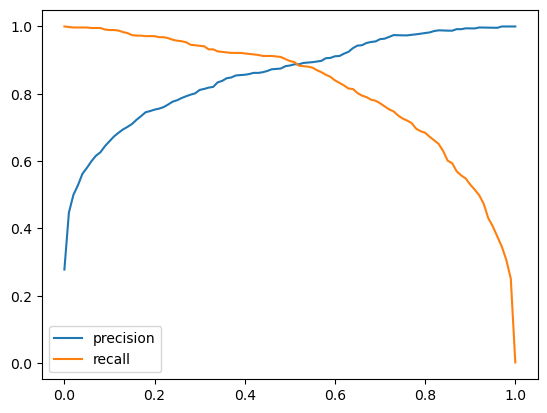

In [119]:
import matplotlib.pyplot as plt
plt.plot(df_scores.threshold,df_scores.precision,label='precision')
plt.plot(df_scores.threshold,df_scores.recall,label='recall')
plt.legend()

# Q3. At which threshold precision and recall curves intersect?
# A. 0.88

In [121]:
df_scores['F1'] = (2 * df_scores['precision'].values * df_scores['recall'].values)/(df_scores['precision'].values+df_scores['recall'].values)

In [122]:
df_scores

,threshold,tp,fp,fn,tn,precision,recall,F1
0,0.00,661,1722,0,0,0.277685,1.000000,0.434668
1,0.01,660,818,1,904,0.446924,0.998489,0.617468
2,0.02,659,661,2,1061,0.499621,0.996979,0.665658
3,0.03,659,590,2,1132,0.528000,0.996979,0.690377
4,0.04,659,514,2,1208,0.562181,0.996979,0.718954
...,...,...,...,...,...,...,...,...
96,0.96,248,1,413,1721,0.996000,0.376133,0.546053
97,0.97,228,0,433,1722,1.000000,0.345921,0.514029
98,0.98,202,0,459,1722,1.000000,0.306647,0.469364
99,0.99,165,0,496,1722,1.000000,0.250755,0.400966


In [137]:
th = [
    0.12,
    0.32,
    0.52,
    0.72
]

In [141]:
c = 0
for x,y in zip(df_scores['threshold'].values,df_scores['F1'].values):
    if c < len(th) and x == th[c]:
        print(x,y)
        c += 1

0.12 0.8084054388133498
0.32 0.8714689265536724
0.52 0.8856926570779713
0.72 0.8479184367034834


# Q4: At which threshold F1 is maximal?
# A: 0.52

In [149]:
def train(df_train,y_train):
    dicts = df_train[categorical+numerical].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(X_train,y_train)
    return dv,model

In [150]:
dv , model = train(df_train,y_train)


In [158]:
def predict(df, dv, model):
    dicts = df[categorical+numerical].to_dict(orient='records')
    X = dv.transform(dicts)
    y_pred = model.predict_proba(X)[:,1]
    return y_pred

In [154]:
y_pred = predict(df_val,dv,model)

In [155]:
from sklearn.model_selection import KFold

In [156]:
kfold = KFold(n_splits=5, shuffle=True, random_state=1)

In [162]:
from tqdm.auto import tqdm
scores = []
for train_idx,val_idx in tqdm(kfold.split(df_full_train)):
    df_train = df_full_train.iloc[train_idx]
    df_val = df_full_train.iloc[val_idx]
    y_train = df_train.above_average.values
    y_val = df_val.above_average.values
    dv, model = train(df_train,y_train)
    y_pred = predict(df_val,dv,model)
    auc = roc_auc_score(y_val,y_pred)
    scores.append(auc)


0it [00:00, ?it/s]

In [166]:
round(np.std(scores),3)

0.003

# Q5. How large is standard deviation of the scores across different folds?
# A. 0.003

In [168]:
round(np.mean(scores),3)

0.979

In [179]:
scores_for_each_c = []

In [169]:
def train_w_c_tuning(df_train,y_train,c):
    dicts = df_train[categorical+numerical].to_dict(orient='records')
    dv = DictVectorizer(sparse=False)
    X_train = dv.fit_transform(dicts)
    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000)
    model.fit(X_train,y_train)
    return dv,model

In [180]:
for c in tqdm([0.01, 0.1, 0.5, 10]):
    scores = []
    for train_idx,val_idx in kfold.split(df_full_train):
        df_train = df_full_train.iloc[train_idx]
        df_val = df_full_train.iloc[val_idx]
        y_train = df_train.above_average.values
        y_val = df_val.above_average.values
        dv, model = train_w_c_tuning(df_train,y_train,c)
        y_pred = predict(df_val,dv,model)
        auc = roc_auc_score(y_val,y_pred)
        scores.append(auc)
    scores_for_each_c.append((c,round(np.mean(scores),3),round(np.std(scores),3)))


  0%|          | 0/4 [00:00<?, ?it/s]

In [181]:
scores_for_each_c

[(0.01, 0.951, 0.006),
 (0.1, 0.97, 0.004),
 (0.5, 0.977, 0.002),
 (10, 0.98, 0.005)]

# Q6. Which C leads to the best mean score?
# A: 10